<a href="https://colab.research.google.com/github/naticanci/Politecnico_KPI/blob/main/Clustering_Hotel_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as Pandas
import seaborn as SeaBorn
import matplotlib.pyplot as PyPlot

In [ ]:
orig_df = Pandas.read_csv('/content/Hotel-class.csv')
orig_df

,ID,Cédula,Sexo,Nombres,Apellidos,Procedencia,Dirección,Edad,Visitas al mes,Tipo hab.,Class
0,300026089,46178491,M,"JUAN,CARLOS","PIÑACUE,ACHICUE",BOGOTÁ,CR 77 BIS 69A 58,24,1,Sencilla,0
1,300026137,362849533,F,"SONIA,ESPERANZA","FLOREZ,VARGAS",PITALITO,CR 3 E 3 A 32,36,1,Sencilla,0
2,300026437,517245914,F,"MARIA,DEL_PILAR","MARTINEZ,MARTINEZ",BOGOTÁ,CR 77 64 C 04,25,1,Sencilla,0
3,300026794,520864169,F,LILIANA,"RIVERA,ORJUELA",BOGOTÁ,CL 152 48 04,27,1,Sencilla,0
4,300026986,762666290,M,"YONI,FERNEY","ALBAN,CARVAJAL",PIENDAMÓ,KM 27 VDA QUEBRADA GRANDE,51,3,Sencilla,1
...,...,...,...,...,...,...,...,...,...,...,...
143,300039794,798780647,M,"BORIS,YESID","RAMIREZ,RINCON",BOGOTÁ,CR 98A 15A 80 IN 3 AP 502,22,5,Doble,1
144,300040282,1010162353,M,JULIAN,"GUERRA,ORTEGA",BOGOTÁ,AK 45 128 D 20 AP 408,58,6,Doble,1
145,300040354,168469232,M,"JEZZER,ANDRES","ZAPATA,ROMERO",PADILLA,VDA LOS ROBLES,32,4,Sencilla,1
146,300040355,1018450028,M,"ANDRES,FELIPE","OCHOA,DIAZ",BOGOTÁ,CL 72 A 20 C 54,44,1,Sencilla,0


In [ ]:
df = orig_df
df["Tipo hab."] = df["Tipo hab."].astype('category')
df["Sexo"] = df["Sexo"].astype('category')
df["Procedencia"] = df["Procedencia"].astype('category')
df["Tipo_hab_cat"] = df["Tipo hab."].cat.codes
df["Sexo_cat"] = df["Sexo"].cat.codes
df["Procedencia_cat"] = df["Procedencia"].cat.codes
df


,ID,Cédula,Sexo,Nombres,Apellidos,Procedencia,Dirección,Edad,Visitas al mes,Tipo hab.,Class,Tipo_hab_cat,Sexo_cat,Procedencia_cat
0,300026089,46178491,M,"JUAN,CARLOS","PIÑACUE,ACHICUE",BOGOTÁ,CR 77 BIS 69A 58,24,1,Sencilla,0,1,1,4
1,300026137,362849533,F,"SONIA,ESPERANZA","FLOREZ,VARGAS",PITALITO,CR 3 E 3 A 32,36,1,Sencilla,0,1,0,28
2,300026437,517245914,F,"MARIA,DEL_PILAR","MARTINEZ,MARTINEZ",BOGOTÁ,CR 77 64 C 04,25,1,Sencilla,0,1,0,4
3,300026794,520864169,F,LILIANA,"RIVERA,ORJUELA",BOGOTÁ,CL 152 48 04,27,1,Sencilla,0,1,0,4
4,300026986,762666290,M,"YONI,FERNEY","ALBAN,CARVAJAL",PIENDAMÓ,KM 27 VDA QUEBRADA GRANDE,51,3,Sencilla,1,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,300039794,798780647,M,"BORIS,YESID","RAMIREZ,RINCON",BOGOTÁ,CR 98A 15A 80 IN 3 AP 502,22,5,Doble,1,0,1,4
144,300040282,1010162353,M,JULIAN,"GUERRA,ORTEGA",BOGOTÁ,AK 45 128 D 20 AP 408,58,6,Doble,1,0,1,4
145,300040354,168469232,M,"JEZZER,ANDRES","ZAPATA,ROMERO",PADILLA,VDA LOS ROBLES,32,4,Sencilla,1,1,1,22
146,300040355,1018450028,M,"ANDRES,FELIPE","OCHOA,DIAZ",BOGOTÁ,CL 72 A 20 C 54,44,1,Sencilla,0,1,1,4


In [ ]:
X = df[['Tipo_hab_cat','Sexo_cat', 'Visitas al mes', 'Edad', 'Procedencia_cat']]
X

,Tipo_hab_cat,Sexo_cat,Visitas al mes,Edad,Procedencia_cat
0,1,1,1,24,4
1,1,0,1,36,28
2,1,0,1,25,4
3,1,0,1,27,4
4,1,1,3,51,27
...,...,...,...,...,...
143,0,1,5,22,4
144,0,1,6,58,4
145,1,1,4,32,22
146,1,1,1,44,4


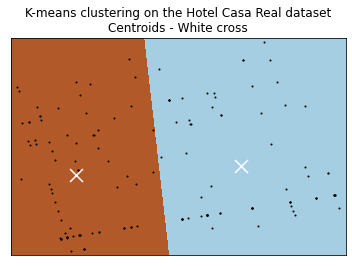

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=2)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the Hotel Casa Real dataset\n"
          "Centroids - White cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
#X = df[['Tipo_hab_cat','Sexo_cat', 'Visitas al mes', 'Edad', 'Procedencia_cat']]
X = df[['Tipo_hab_cat','Sexo_cat', 'Visitas al mes']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['k-means-labels'] = kmeans.labels_
k=df[['Nombres','k-means-labels']]
k


,Nombres,k-means-labels
0,"JUAN,CARLOS",0
1,"SONIA,ESPERANZA",0
2,"MARIA,DEL_PILAR",0
3,LILIANA,0
4,"YONI,FERNEY",0
...,...,...
143,"BORIS,YESID",1
144,JULIAN,1
145,"JEZZER,ANDRES",1
146,"ANDRES,FELIPE",0


In [ ]:
TP,TN,FP,FN = 0,0,0,0
y_true = df['Class'].tolist()
y_pred = df['k-means-labels'].tolist()
for i in range(len(y_true)):
  y_t = y_true[i]
  y_p = y_pred[i]
  if y_t == y_p:
    if y_t == 1:
      TP += 1 #adivinó un verdadero positivo
    else:
      TN +=1 #adivinó un verdadero negativo
  else: #Estamos en la categoría de un falso
    if y_t == 1:
      FN +=1 #el clasificador dijo falso pero en realidad es verdadero
    else:
      FP +=1



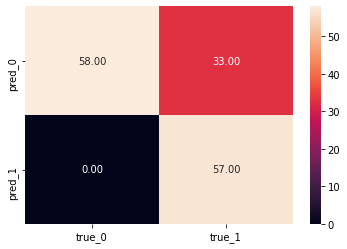

In [ ]:
SeaBorn.heatmap(data=[[TN,FN],
                      [FP,TP]],
                annot=True,
                fmt='.2f',
                xticklabels=['true_0','true_1'],
                yticklabels=['pred_0','pred_1'])
PyPlot.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['Turista','Corporativo']))

              precision    recall  f1-score   support

     Turista       0.39      0.50      0.44        58
 Corporativo       0.61      0.50      0.55        90

    accuracy                           0.50       148
   macro avg       0.50      0.50      0.49       148
weighted avg       0.52      0.50      0.51       148



number of estimated clusters : 2


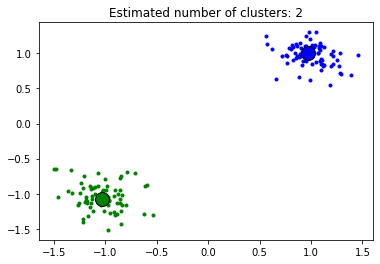

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1]]
X, _ = make_blobs(n_samples=148, centers=centers, cluster_std=0.2)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=148)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
df['cluster'] = cluster_centers_
y_true = df['Class'].tolist()
y_pred = df['cluster'].tolist()
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred,target_names=['Turista','Corporativo']))

NameError: ignored

In [ ]:
TP,TN,FP,FN = 0,0,0,0
y_true = df['Class'].tolist()
y_pred = df['cluster'].tolist()
for i in range(len(y_true)):
  y_t = y_true[i]
  y_p = y_pred[i]
  if y_t == y_p:
    if y_t == 1:
      TP += 1 #adivinó un verdadero positivo
    else:
      TN +=1 #adivinó un verdadero negativo
  else: #Estamos en la categoría de un falso
    if y_t == 1:
      FN +=1 #el clasificador dijo falso pero en realidad es verdadero
    else:
      FP +=1


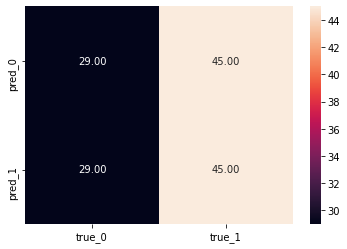

In [ ]:
SeaBorn.heatmap(data=[[TN,FN],
                      [FP,TP]],
                annot=True,
                fmt='.2f',
                xticklabels=['true_0','true_1'],
                yticklabels=['pred_0','pred_1'])
PyPlot.show()

Mientras que usamos la parte de entrenamiento para construir los parámetros de nuestro clasificador, ahora debemos ver cómo se comporta en la parte de entrenamiento. Entonces, estimemos los valores de nuestro clasificador en el dataset de prueba:

In [ ]:
y_prediccion =[]
for idx,fila in X_test.iterrows():
  skewness = fila['Skewness']
  prediccion = clasificador_prueba_Z(skewness)
  y_prediccion.append(prediccion)

## evaluación del clasificador inocente (prueba Z)

Debemos ver qué tan bien le fue al clasificador de la prueba Z prediciendo. Notemos que el valor original está en y_test, mientras que el valor predicho está en y_prediccion.

In [ ]:
#vamos a calcular los componentes de la matriz de confusión
TP,TN,FP,FN = 0,0,0,0
y_true = list(y_test)
for i in range(len(y_true)):
  y_verdadero = y_true[i]
  y_predicho = y_prediccion[i]
  #estamos en el caso de un verdadero
  if y_verdadero == y_predicho:
    if y_verdadero == 1:
      TP += 1 #adivinó un verdadero positivo
    else:
      TN +=1 #adivinó un verdadero negativo
  else: #Estamos en la categoría de un falso
    if y_verdadero == 1:
      FN +=1 #el clasificador dijo falso pero en realidad es verdadero
    else:
      FP +=1

Ahora, podemos graficar la matriz de confusión de nuestro clasificador

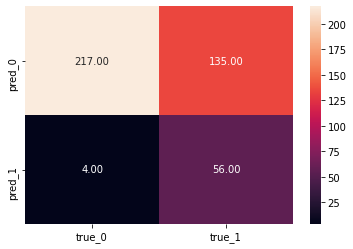

In [ ]:
SeaBorn.heatmap(data=[[TN,FN],
                      [FP,TP]],
                annot=True,
                fmt='.2f',
                xticklabels=['true_0','true_1'],
                yticklabels=['pred_0','pred_1'])
PyPlot.show()

Y veamos cómo nos quedan nuestros indicadores

In [ ]:
exactitud = float(TN+TP) / float(TN+TP+FN+FP)
precision = float(TP)/ float(TP+FP)
sensibilidad = float(TP)/ float(TP+FN)
print('Exactitud',"{:,.2f}%".format(100*exactitud))
print('Precisión',"{:,.2f}%".format(100*precision))
print('Sensibilidad',"{:,.2f}%".format(100*sensibilidad))
f_score = 2.0*(precision*sensibilidad)/(precision+sensibilidad)
print('F-score',"{:,.2f}%".format(100*f_score))

Exactitud 66.26%
Precisión 93.33%
Sensibilidad 29.32%
F-score 44.62%


También todo esto lo podemos calcular usando las librerías de Python usando otros paquetes de la librería SKLearn:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

La matriz de confusión usando SKLearn va a ser transpuesta de la que generamos. No afecta la forma como la calculamos. Son los mismos valores en otro orden.

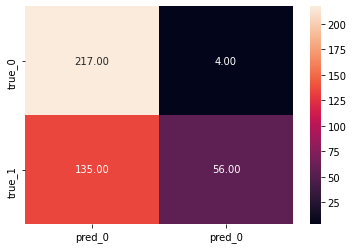

In [ ]:
matriz_confusion = confusion_matrix(y_test,y_prediccion)
SeaBorn.heatmap(matriz_confusion,
                annot=True,
                fmt='.2f',
                xticklabels=['pred_0','pred_0'],
                yticklabels=['true_0','true_1'])
PyPlot.show()

De la misma forma podemos calcular los indicadores usando el paquete de

In [ ]:
print(classification_report(y_test,y_prediccion,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.62      0.98      0.76       221
     Class 1       0.93      0.29      0.45       191

    accuracy                           0.66       412
   macro avg       0.77      0.64      0.60       412
weighted avg       0.76      0.66      0.61       412



#una clasificación usando un arbol de clasificación profesional

Vamos a hacer el mismo ejercicio, pero usando un clasificador de árbol propio de la librería SKLearn.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Para crear un árbol en Python es bastante simple. Solo debemos instanciar la clase *DecisionTreeClassifier*

In [ ]:
arbol = DecisionTreeClassifier()

y hacer el entrenamiento con los datos de entrenamiento. Esto ajustará los parámetros del arbol al 70% de los datos que separamos para ajuste.

Notemos que son los mismos datos que usamos para calcular los parámetros de la prueba Z que usamos antes.

In [ ]:
arbol = arbol.fit(X_train,y_train)

Ahora, vamos a hacer una predicción sobre los datos de evaluación (notemos que son los mismos que usamos para el clasificador *inocente*):

In [ ]:
y_pred = arbol.predict(X_test)

Como es un problema de clasificación, podemos usar las mismas instrucciones para construir los indicadores que teníamos con el otro clasificador: (1) la matriz de confusión y (2) el reporte de clasificación.

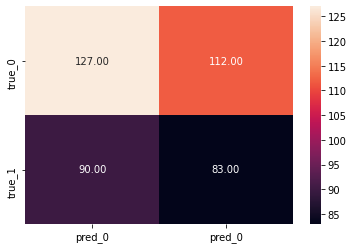

In [ ]:
matriz_confusion = confusion_matrix(y_test,y_pred)
SeaBorn.heatmap(matriz_confusion,
                annot=True,
                fmt='.2f',
                xticklabels=['pred_0','pred_0'],
                yticklabels=['true_0','true_1'])
PyPlot.show()

y el reporte de clasificación:

In [ ]:
print(classification_report(y_test,y_pred,target_names=['Class 0','Class 1']))

              precision    recall  f1-score   support

     Class 0       0.95      0.93      0.94       222
     Class 1       0.92      0.94      0.93       190

    accuracy                           0.93       412
   macro avg       0.93      0.94      0.93       412
weighted avg       0.93      0.93      0.93       412



Notemos que este clasificador supera por mucho el clasificador que habíamos hecho usando la prueba Z, tanto en exactitud como en los otros indicadores.

Ahora, si queremos visualizar el árbol de decisión necesitaremos hacer uso de varias librerías:

In [ ]:
!apt-get install python-pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  python-pyparsing
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pyparsing
0 upgraded, 2 newly installed, 0 to remove and 12 not upgraded.
Need to get 71.7 kB of archives.
After this operation, 347 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Fetched 71.7 kB in 1s (118 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 146364 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+dfsg1-2_all.deb ...
Unpacking python-pyparsing (2.2.0+dfsg1-2) ...
Selecting previously unselected package python-pydot.
Preparing to unp

In [ ]:
!pip install pydotplus

Ahora importamos las librerías que recién instalamos.

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Ahora usamos el siguiente bloque para visualizar nuestro árbol de decisión.

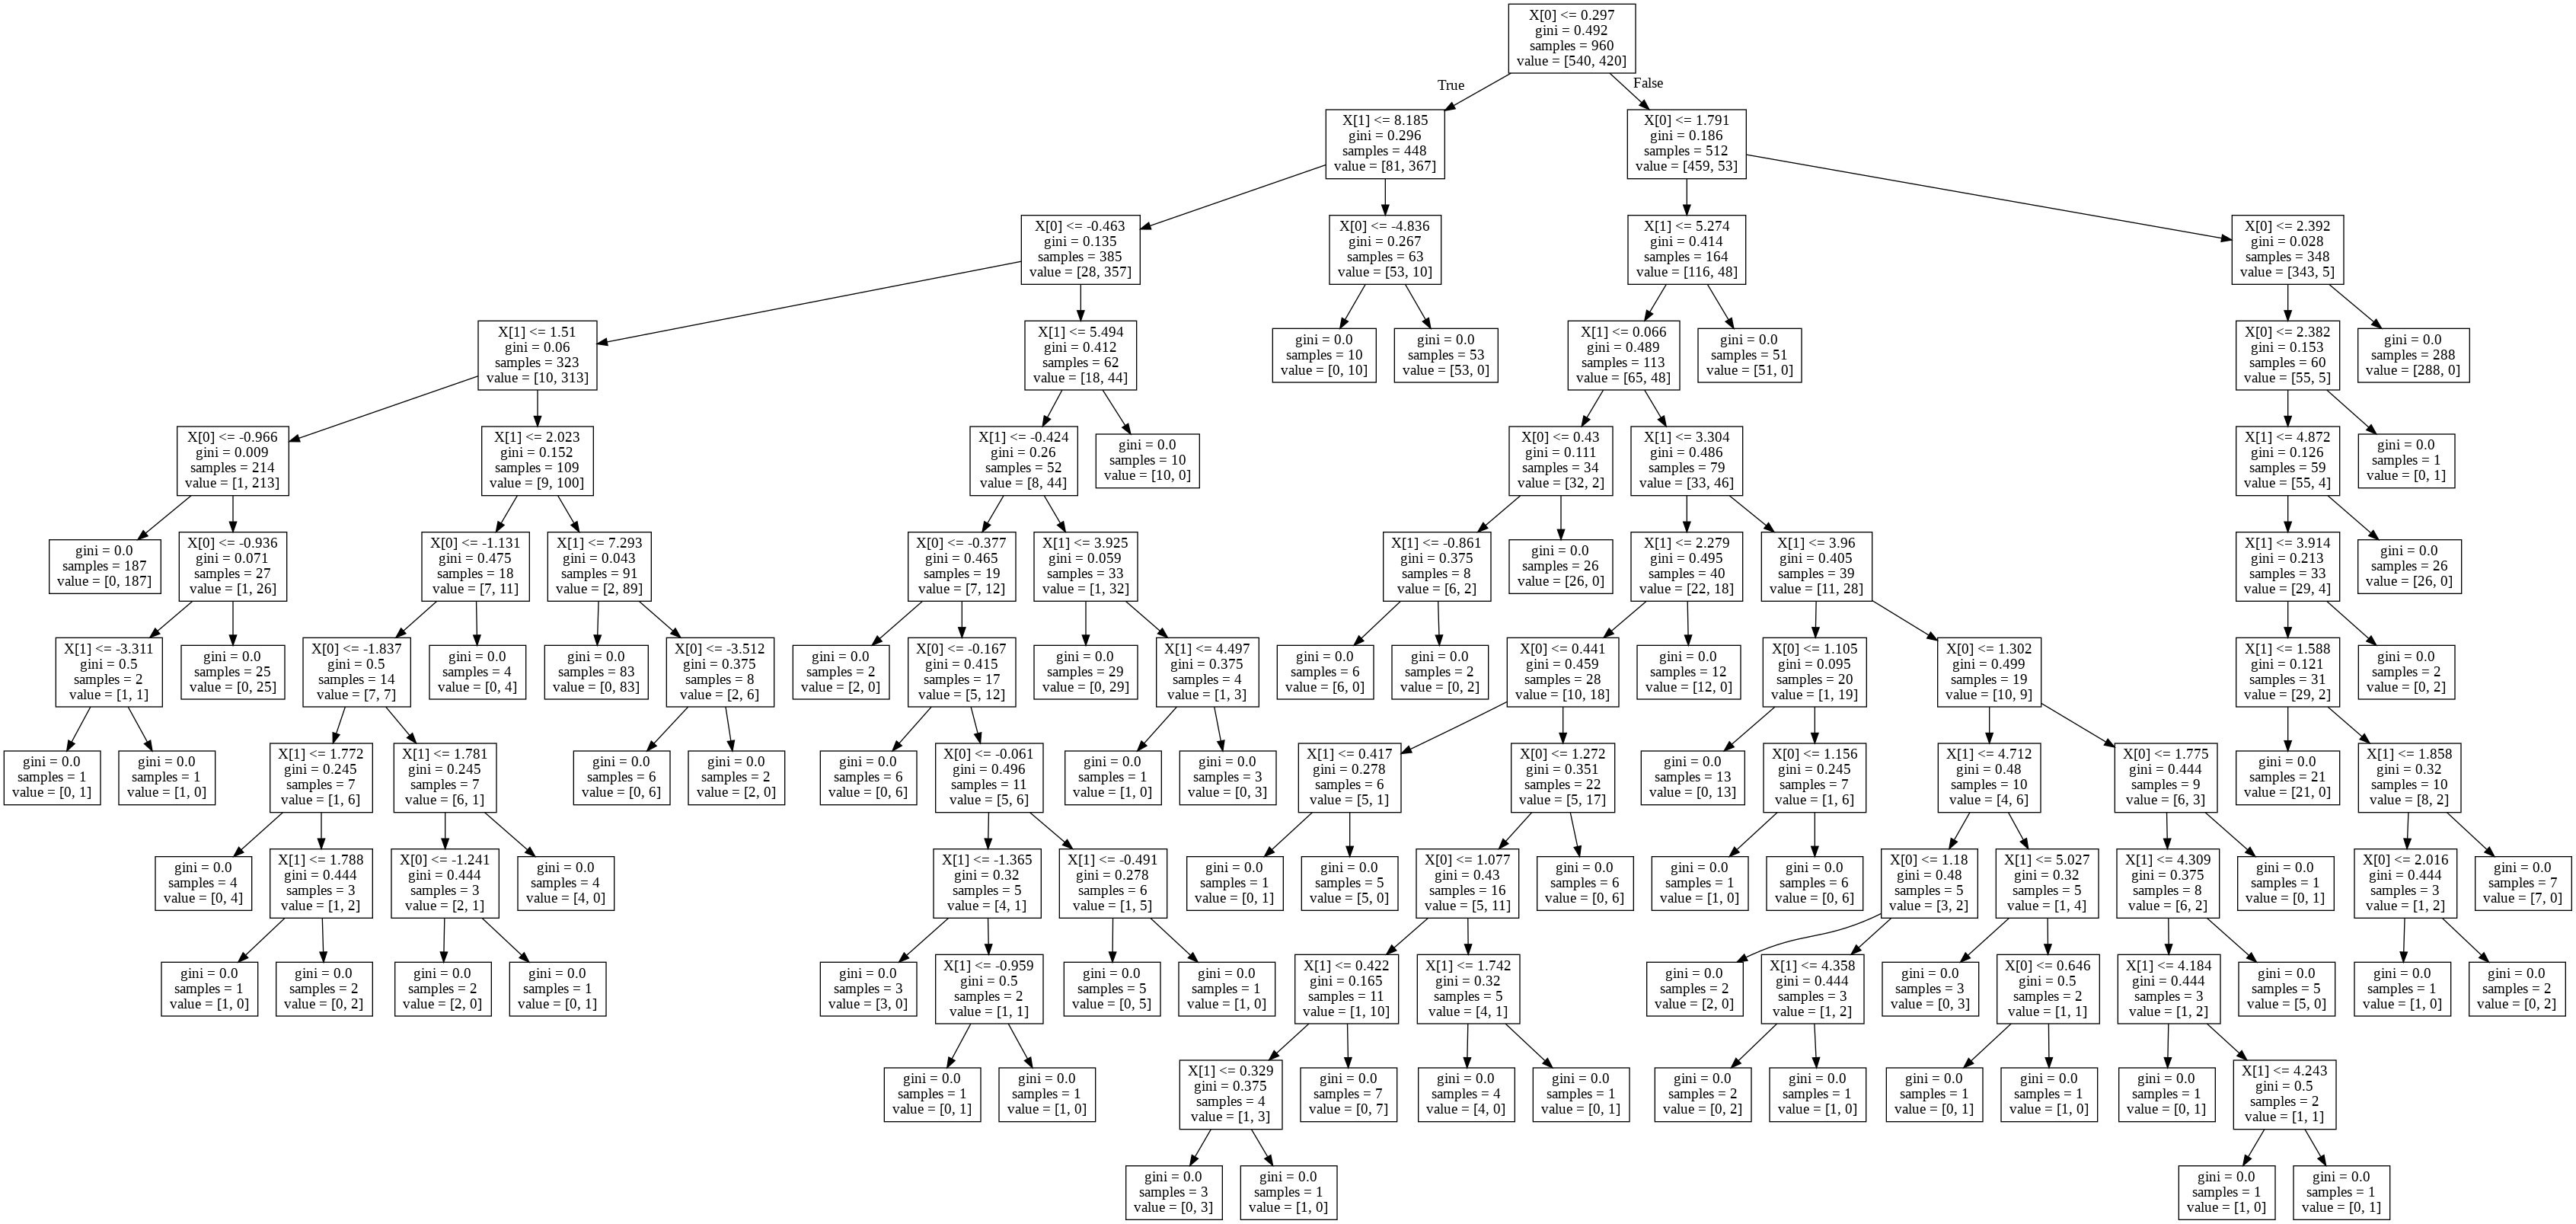

In [ ]:
datos_archivo_dot = StringIO() #para generar un archivo con la información del árbol
export_graphviz(arbol,out_file=datos_archivo_dot)
grafica = pydotplus.graph_from_dot_data(datos_archivo_dot.getvalue())
Image(grafica.create_png())

## El paso a producción: almacenando los parámetros del árbol obtenido para uso posterior.

Notemos que este es un árbol muy extenso, pero tiene una exactitud muy buena. Estos parámetros son lo que buscabamos a través del entrenamiento y son estos los parámetros de nuestro producto que queremos entregar.

Para guardar los parámetros de este árbol y desplegarlo en otra aplicación deberemos usar una librería para *serializar* el árbol (guardarlo en un archivo con formato especial). Este archivo es el core de la solución que queremos.  

Este paso a producción depende del programa que se usamos para generar el modelo y estamos sujetos  a usar las herramientas que él ofrece.

En este caso (Python), usaremos la librería *pickle* de python para guardar el modelo en un archivo con extensión .sav*

In [ ]:
import pickle

Ahora, vamos a guardar el archivo y vamos a descargarlo.

In [ ]:
nombre_archivo = 'arbol_clasificacion_cheques.sav'
pickle.dump(arbol,open(nombre_archivo,'wb')) #vamos a guardar los parámetros en el archivo.

ahora, vamos a descargar el archivo obtenido de esta iteración (esto funciona mejor en Chrome) pues Colab es de Google.

In [ ]:
from google.colab import files

files.download('arbol_clasificacion_cheques.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El archivo que acaban de descargar es el archivo maestro y es el que pasa a producción, para generar una aplicación web, una app de celular etc. Es este sencillo archivo el que vale oro y es un secreto industrial.  


#Desplegando una solución

A partir del archivo generado anteriormente *'arbol_clasificacion_cheques.sav'* podemos montar un arbol de clasificación que puede vivir en internet (a saber dentro de este mismo Colab) y que es la herramienta que usarán usuarios finales.

Así, vamos a subir el archivo generado anteriormente:


In [ ]:
from google.colab import files
subidor_archivos = files.upload()

Saving arbol_clasificacion_cheques.sav to arbol_clasificacion_cheques.sav


Ahora, vamos a usar este archivo para cargarlo dentro de un árbol de clasificación nuevo que llamaremos *arbol_produccion*

In [ ]:
import pickle
arbol_produccion = pickle.load(open('arbol_clasificacion_cheques.sav','rb'))

# El producto resultante

Nuestro producto resultante que utiliza los parámetros del árbol de producción es muy sencillo. Un formulario, donde escribiremos a mano los valores del *Variance* y la *Skewness* de un cheque particular y el programa nos informará si el cheque es verdadero o falso.

En el caso real, usaríamos más bien un analizador de fotos (con un scanner probablemente) que a partir de la foto, calcule los valores de su *Variance*, *Skewness* y demás y nos retorne un mensaje (un diálogo por ejemplo) que diga si el cheque es falso o verdadero.

In [ ]:
import numpy as NumPy

In [ ]:
#@title Ingrese el valor de la Variance y la Skewness del cheque.
#@Ingrese los valores usando el punto decimal, no la coma.

variance =   -1#@param
skewness =  2#@param
#ahora calculamos con el árbol cargado del archivo.
valores = NumPy.array([variance,skewness])
valor = arbol_produccion.predict(valores.reshape(1,-1))
#mostramos la predicción aquí en la consola
prediccion = 'ES VERDADERO'
if valor[0] == 1:
  prediccion = 'ES FALSO'
print('Resultado: ')
print('El cheque es',prediccion)

Resultado: 
El cheque es ES FALSO


Desde el punto de vista técnico esto es un producto completo. Sin embargo, es un producto un tanto inútil pues la plataforma de despliegue es Colab, quien use este programa debe tener por un lado calculado el valor de la variance y la skewness de un cheque particular.

A este producto le falta todo el diseño de interfaz y además todo el diseño UX para que por ejemplo (en un banco) un cajero lo pueda utilizar.